In [1]:
#Import important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
plt.style.use('ggplot')

#Import big mart data base training set & test set
train = pd.read_csv('train_bigmart.csv')
test = pd.read_csv('test_bigmart.csv')

# Exploratory Data Analysis (EDA)

In [2]:

print(train.head(10))

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  1

In [3]:
#Data Shape
train.shape

(8523, 12)

In [4]:
#Data Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


from overview data, we will know we have 11 attributes composes of float64 = 3, int64 =1, and object = 7
Total Observation in training set 8523 observations

In [5]:
#Statistic Summary of Trainin Set
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Is it impossible that item_Visibility (% display area in the store) for any item to be zero?

If they sold in the shop should be not zero, they should have area to display 

In [6]:
#To Find Numerical Features from Data Set

numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

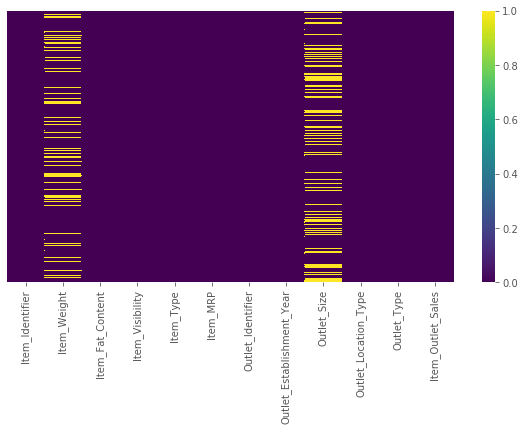

In [7]:
#Check missing value in our data set
train.isnull().sum()

#Visualize Missing Value by Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(), yticklabels=False, cmap = 'viridis' )

In [8]:
#To See Category in each object
#Item_Fat_Content
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [9]:
#Item_Type
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [10]:
#Outlet_Size
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [11]:
#Outlet_Type
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [12]:
#Outlet_Identifier
train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [21]:
#Outlet_Location_Type
train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [19]:
#To Find Item_Visibility zero vavlue
(train['Item_Visibility']==0).sum()

526

# Exploring Data Distribution

Text(0.5, 1.0, 'Weight Distribution')

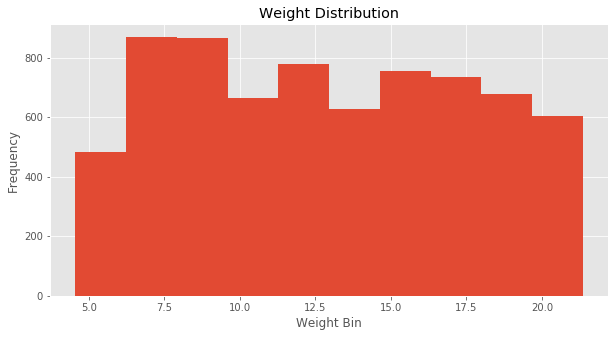

In [13]:
#Weight Distribution
train['Item_Weight'].plot.hist(figsize = (10,5))
plt.xlabel('Weight Bin')
plt.title('Weight Distribution')

Text(0.5, 1.0, 'Visibility Distribution')

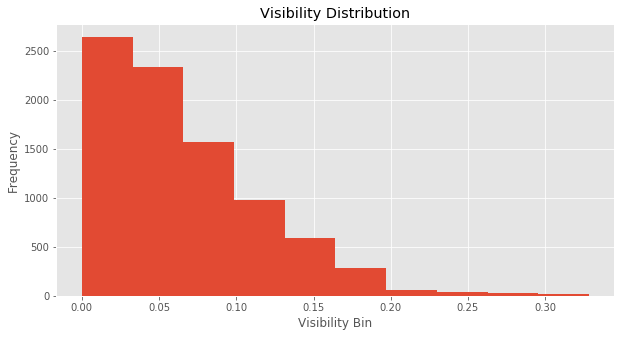

In [14]:
#Visibility Distribution
train['Item_Visibility'].plot.hist(figsize = (10,5))
plt.xlabel('Visibility Bin')
plt.title('Visibility Distribution')

Text(0.5, 1.0, 'Maximum Retail Price Distribution')

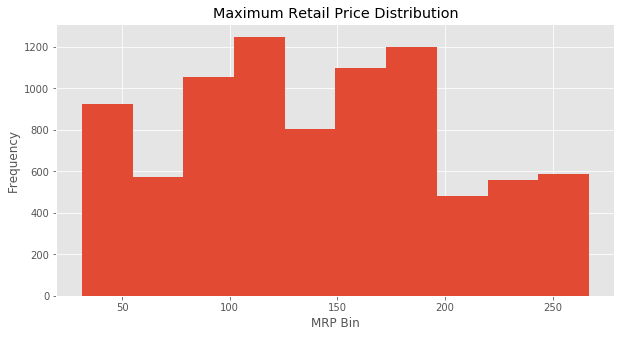

In [15]:
#Maximum Retail Price Distribution
train['Item_MRP'].plot.hist(figsize = (10,5))
plt.xlabel('MRP Bin')
plt.title('Maximum Retail Price Distribution')

Text(0.5, 1.0, 'Item Outlet Sales Distribution')

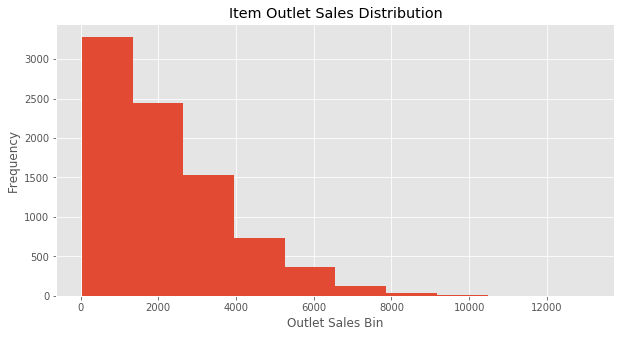

In [16]:
#Item Outlet Sale Distribution
train['Item_Outlet_Sales'].plot.hist(figsize = (10,5))
plt.xlabel('Outlet Sales Bin')
plt.title('Item Outlet Sales Distribution')

# Exploring Binary and Categorical Data

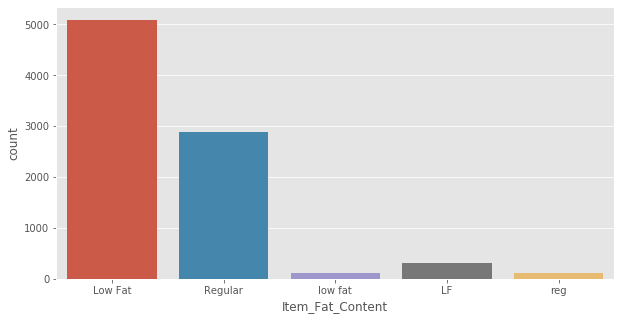

In [17]:
#Distribution of Variable "Item Fat Content"
plt.figure(figsize=(10,5))
sns.countplot(x='Item_Fat_Content', data= train)

It seem to be only 2 category in this category "Low Fat" and "Regular" we have to replace low fat, LF with Low Fat and reg with Regular

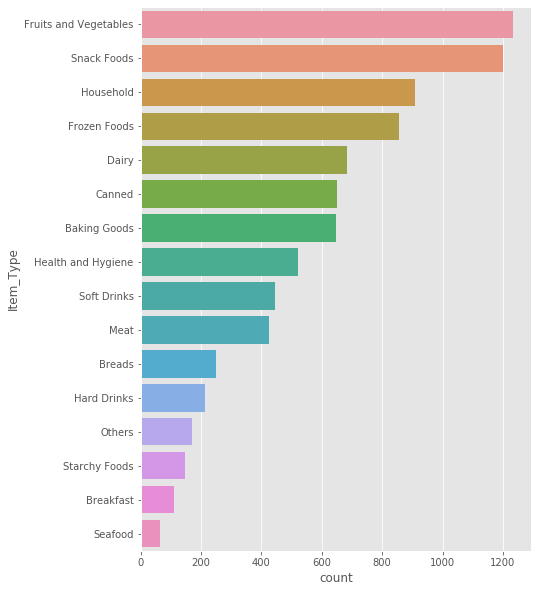

In [8]:
#Distribution of Variable "Item Type"
plt.figure(figsize=(7,10))
sns.countplot(y='Item_Type', data= train, order = train['Item_Type'].value_counts().index)

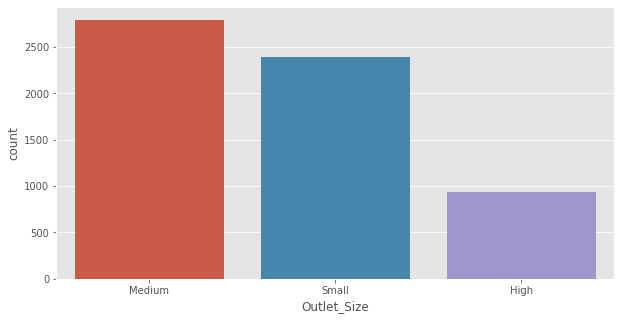

In [7]:
#Distribution of Variable "Outlet Size"
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Size', data= train, order = train['Outlet_Size'].value_counts().index)

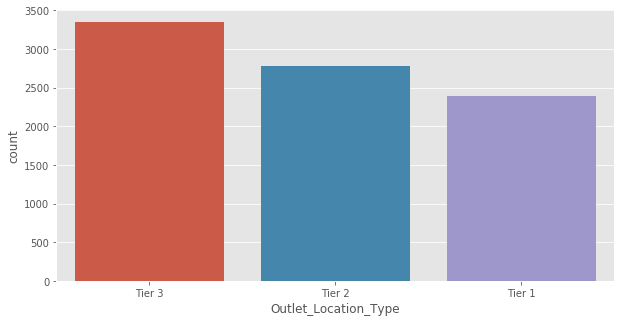

In [6]:
#Distribution of Variable "Outlet Location Type"
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Location_Type', data= train, order =train['Outlet_Location_Type'].value_counts().index)

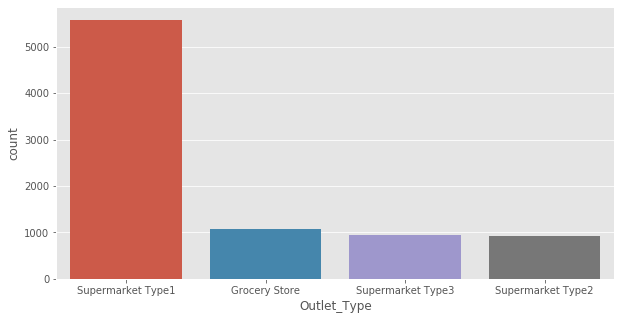

In [10]:
#Distribution of Variable "Outlet Type"
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Type', data= train, order = train['Outlet_Type'].value_counts().index)

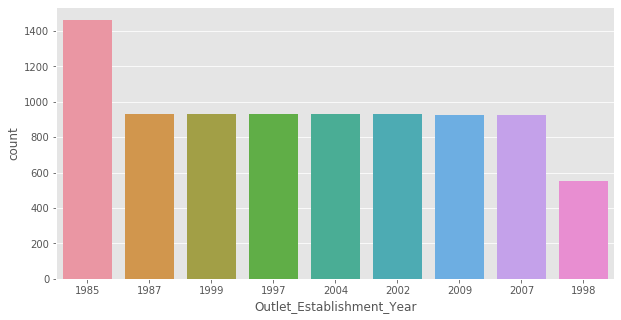

In [13]:
#Distribution of Variable "Outlet Establishment Year"
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Establishment_Year', data= train, order = train['Outlet_Establishment_Year'].value_counts().index)

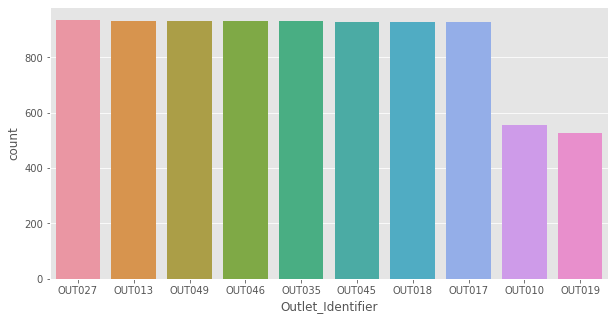

In [17]:
#Distribution of Variable "Outlet Identifier"
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Identifier', data= train, order = train['Outlet_Identifier'].value_counts().index)

<function matplotlib.pyplot.show(*args, **kw)>

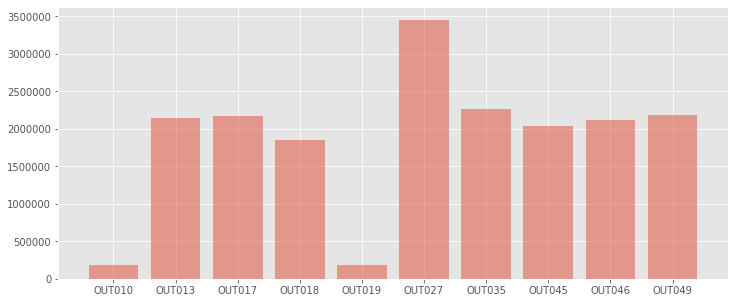

In [50]:
#Total Sales of Outlet Identifier
total_sales1 = train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
objects = ('OUT010','OUT013','OUT017','OUT018','OUT019','OUT027','OUT035','OUT045','OUT046','OUT049')
y_pos = np.arange(len(objects))
plt.figure(figsize=(12,5))
plt.bar(y_pos, total_sales1, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

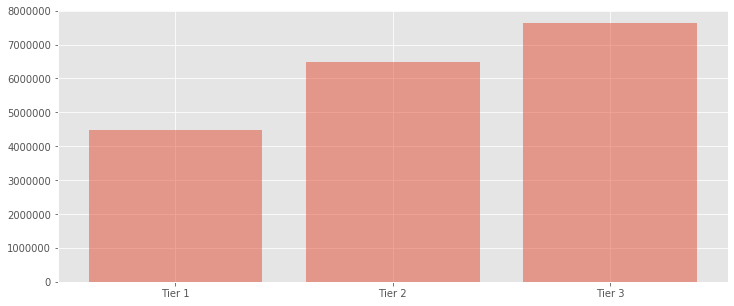

In [57]:
#Total Sales of Outlet Location Type
total_sales2=train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()
objects = ('Tier 1','Tier 2','Tier 3')
y_pos = np.arange(len(objects))
plt.figure(figsize=(12,5))
plt.bar(y_pos, total_sales2, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

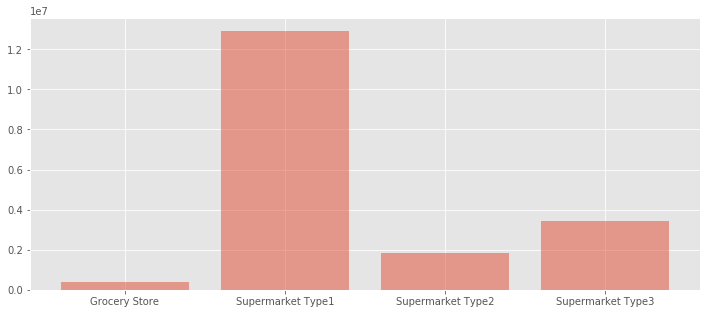

In [59]:
#Total Sales of Outlet Location Type
total_sales3 = train.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
objects = ('Grocery Store','Supermarket Type1','Supermarket Type2','Supermarket Type3' )
y_pos = np.arange(len(objects))
plt.figure(figsize=(12,5))
plt.bar(y_pos, total_sales3, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show


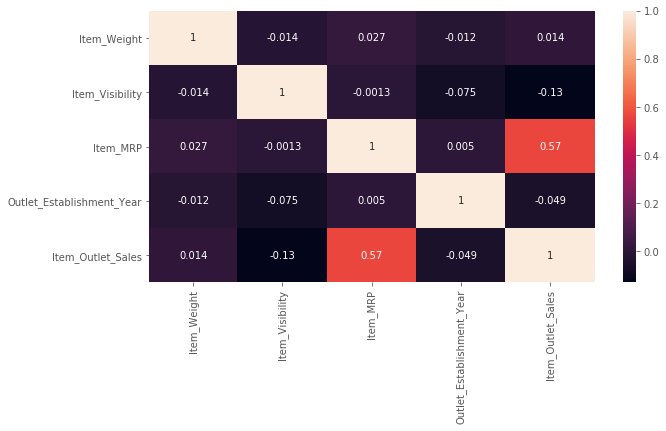

In [23]:
#Correlation Between Numerical Feature
train.corr()
plt.figure(figsize = (10,5))
sns.heatmap(train.corr(), annot=True)

You will see from the Correlation matrix only item_MRP correlated with Item_Outlet_Sales, Attributes not correlate each other

# Bivariate Analysis

To understand relationship between our features and target variable

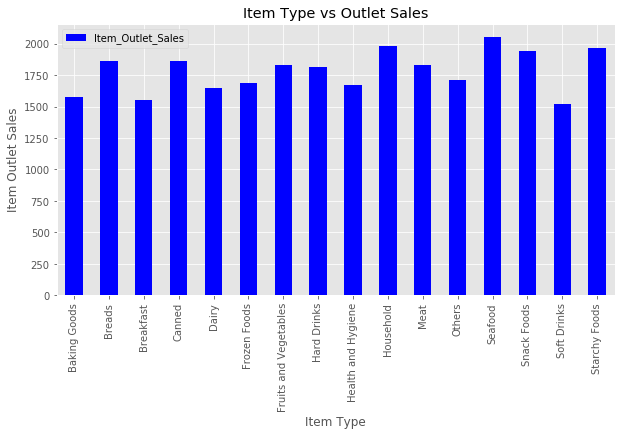

In [24]:
#Item Type and Outlet Sales by median
Item_Type_pivot = train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Type_pivot.plot(kind='bar', color='blue', figsize = (10,5))
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.title('Item Type vs Outlet Sales')
plt.show()

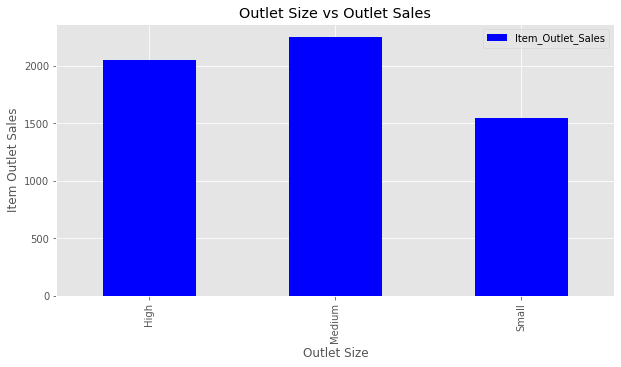

In [25]:
#Outlet Size and Outlet Sales by median
Outlet_Size_pivot = train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue', figsize = (10,5))
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.title('Outlet Size vs Outlet Sales')
plt.show()

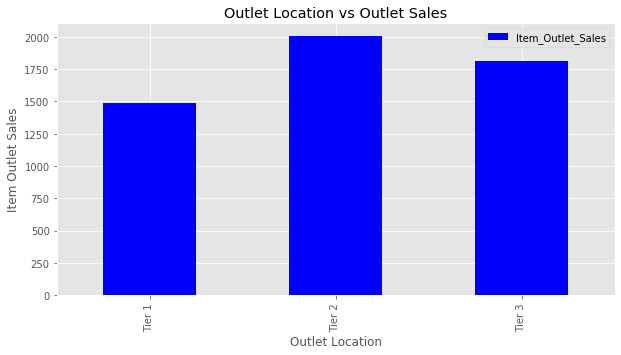

In [26]:
#Outlet Location and Outlet Sales by median
Outlet_Location_pivot = train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_pivot.plot(kind='bar', color='blue', figsize = (10,5))
plt.xlabel('Outlet Location')
plt.ylabel('Item Outlet Sales')
plt.title('Outlet Location vs Outlet Sales')
plt.show()

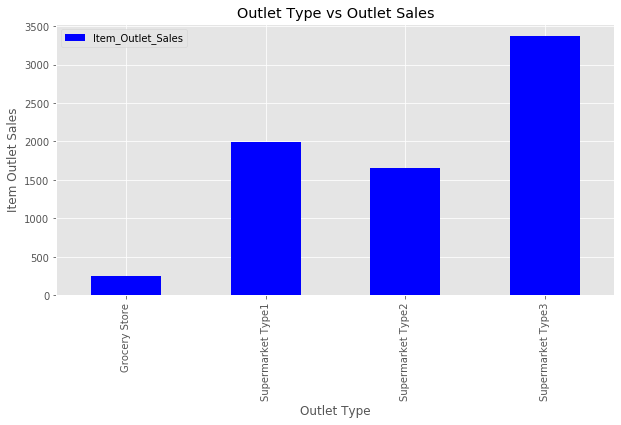

In [27]:
#Outlet Type and Outlet Sales by median
Outlet_Type_pivot = train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue', figsize = (10,5))
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.title('Outlet Type vs Outlet Sales')
plt.show()

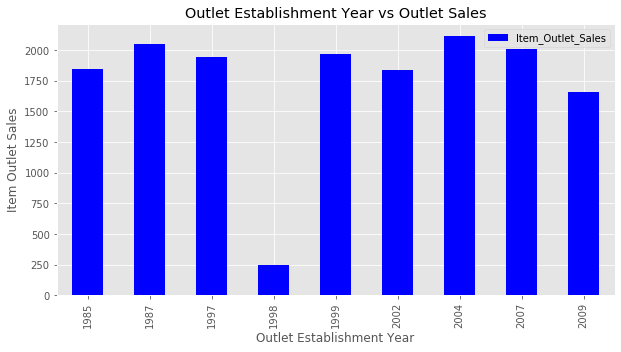

In [28]:
#Outlet Establishment Year and Outlet Sales by median
Establishment_Year_pivot = train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Establishment_Year_pivot.plot(kind='bar', color='blue', figsize = (10,5))
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.title('Outlet Establishment Year vs Outlet Sales')
plt.show()

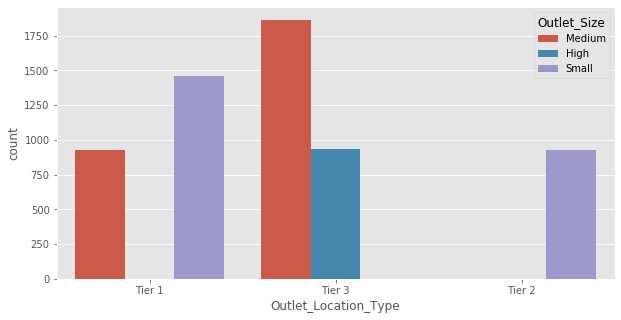

In [15]:
#Distribution of Variable "Outlet Location Type"
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Location_Type', hue='Outlet_Size', data= train)

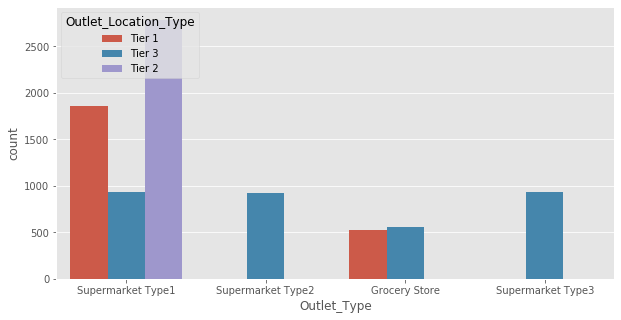

In [98]:
#Distribution of Variable "Outlet Type"
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Type', hue='Outlet_Location_Type', data= train)

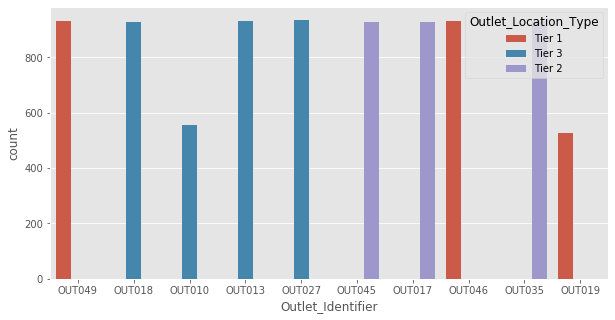

In [60]:
#Distribution of Variable "Outlet Identifier"
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Identifier', hue='Outlet_Location_Type', data= train)

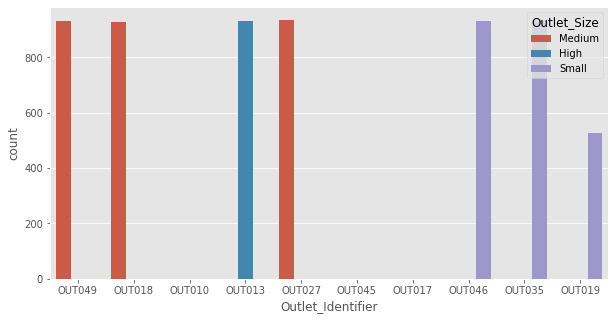

In [61]:
#Distribution of Variable "Outlet Identifier"
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Identifier', hue='Outlet_Size', data= train)

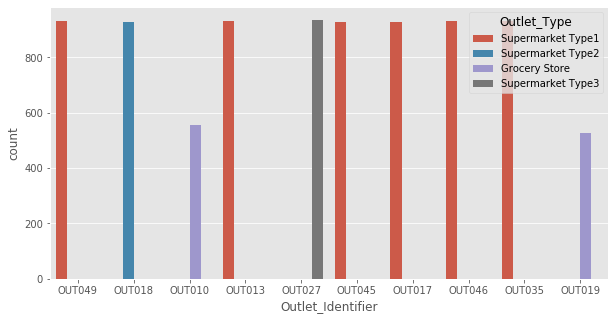

In [62]:
#Distribution of Variable "Outlet Identifier"
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Identifier', hue='Outlet_Type', data= train)

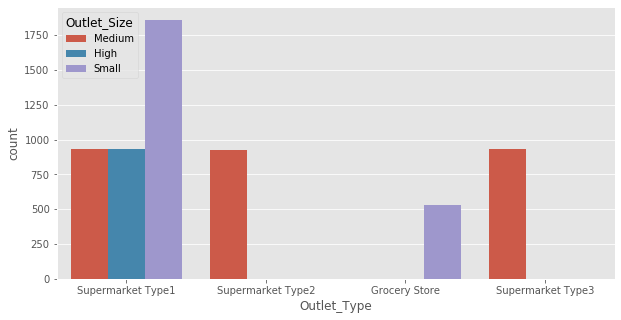

In [30]:
#Distribution of Variable "Outlet Type"
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Type', hue='Outlet_Size', data= train)

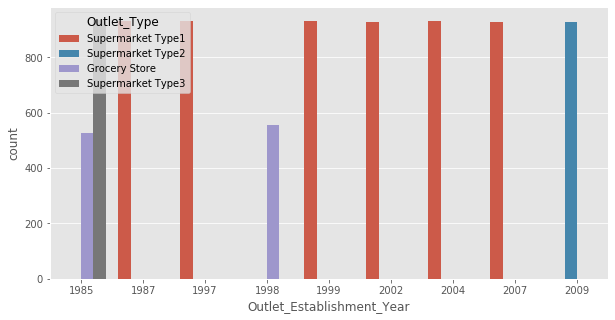

In [101]:
#Distribution of Variable "Outlet Establish Year"
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Establishment_Year', hue='Outlet_Type', data= train)

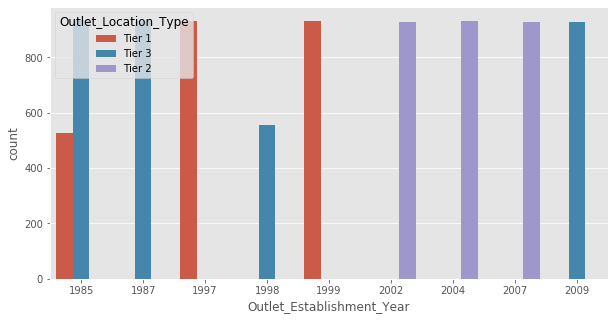

In [103]:
#Distribution of Variable "Outlet Establish Year"
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Establishment_Year', hue='Outlet_Location_Type', data= train)

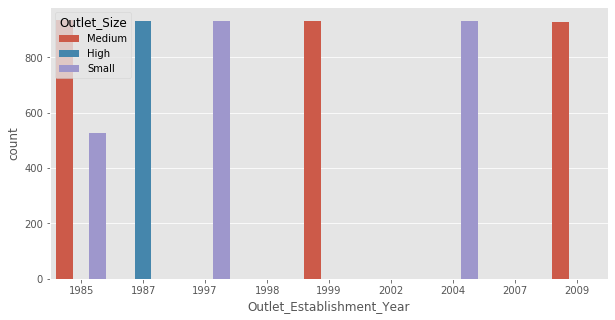

In [104]:
#Distribution of Variable "Outlet Establish Year"
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Establishment_Year', hue='Outlet_Size', data= train)

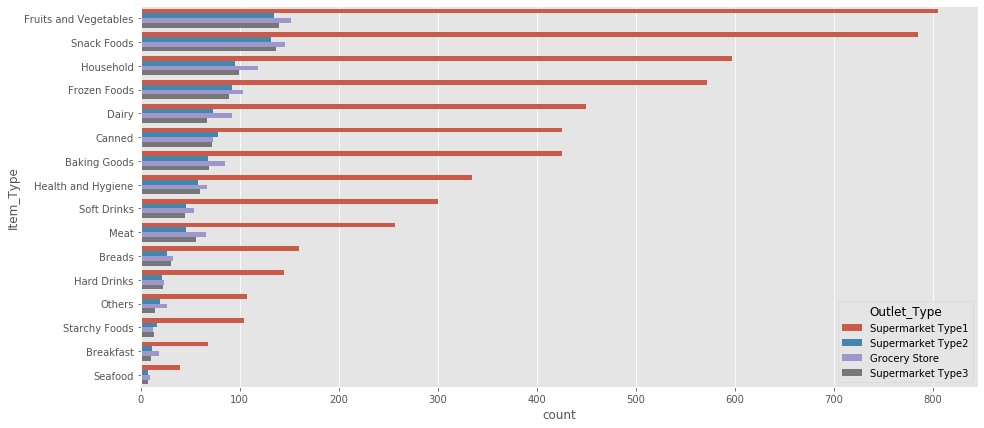

In [16]:
#Distribution of Variable "Item Type"
plt.figure(figsize=(15,7))
sns.countplot(y='Item_Type', hue='Outlet_Type', data= train, order= train['Item_Type'].value_counts().index)

# Data Preprocessing

We already known what to do, grouping some category, and impute missing value on 3 topic item weight, item visibility, and outlet size

before we convert anything in the data set, we have to join train & test data set together

Easy to Pre-Processing one time

In [2]:
#Join Train and Test Data Set
train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], ignore_index = True, sort = False)

#Check data set after concatenate 
print(data.head(10))

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  1

In [3]:
#Looking for missing value in term of percentage
data.isnull().sum()/data.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

# Impute Missing Value

Firstly we gonna grouping Item_Fat_Content into 2 groups 'Low Fat' and 'Regular' replacing to LF, low fat, and reg

In [4]:
#Apply function len(unique()) to every data variable
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [292]:
#Replace value
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})

#Check Item_Fat_Content to make sure only 2 categories
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [5]:
#Impute missing value for Item Visibility with median
data['Item_Visibility'] = data['Item_Visibility'].replace(0, np.nan)

median = data['Item_Visibility'].median()

#Fill NaN with median
data['Item_Visibility'] = data['Item_Visibility'].fillna(median)

In [6]:
#Impute value with mean for Item_Weight due to it is not sensitive with Outlier
mean_wt = data['Item_Weight'].mean()

data['Item_Weight'] = data['Item_Weight'].fillna(mean_wt).astype('float')

#Check Missing Value at column Item_Weight
data['Item_Weight'].isnull().sum()

0

In [7]:
#Impute Category on Outlet Size with Most Common Class
most_frequent = data['Outlet_Size'].value_counts().idxmax()

data['Outlet_Size'] = data['Outlet_Size'].fillna(most_frequent).astype('object')


In [8]:
#After impute all missing value, double check missing value
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [9]:
data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

# Create Broad Category Type of Item

In [10]:
#Get the first two characters of ID:
data['Item_Category'] = data['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them as Food , Non-Consumable, and Drink
data['Item_Category'] = data['Item_Category'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

data['Item_Category'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Category, dtype: int64

# Determine the years of operation of a store

Due to the data was collect in 2013, we gonna calculate present year of operation in 2013

In [11]:
#Years of Operation:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

# Feature Engineering with Categorical Data

Feature Engineer with Ordinal data so we use mapping the number to them

In [12]:
#Transform and Mapping Outlet Size
outlet_size_map = {'Small':1, 'Medium':2, 'High':3}
data['Outlet_Size'] = data['Outlet_Size'].apply(lambda line: outlet_size_map[line])

In [13]:
#Transform and Mapping Outlet Location
outlet_location_map ={'Tier 1':1, 'Tier 2':2, 'Tier 3':3}
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].apply(lambda line: outlet_location_map[line])

Feature Engineer with Non-ordinal data so we use dummy variable and drop 1 column

In [14]:
#Transform Outlet Type by dummy variable
type_dummy_features = pd.get_dummies(data['Outlet_Type'], drop_first=True)

data = pd.concat([data, type_dummy_features], axis=1)

In [15]:
#Transform Fat Content by dummy variable
fatcontent_dummy_features = pd.get_dummies(data['Item_Fat_Content'],drop_first=True)

data = pd.concat([data, fatcontent_dummy_features], axis=1)

In [16]:
#Transform Item_Type by dummy variable
category_dummy_features = pd.get_dummies(data['Item_Category'], drop_first=True)

data = pd.concat([data, category_dummy_features], axis=1)

In [17]:
#Transform Outlet_Identifier by dummy variable
outlet_dummy_features = pd.get_dummies(data['Outlet_Identifier'], drop_first=True)

data = pd.concat([data, outlet_dummy_features], axis=1)

We gonna drop some features that are not necessary as following

'Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier'

In [18]:
#Drop some feature that not necessary for prediction target variable
data = data.drop(['Item_Identifier', 'Item_Fat_Content', 'Item_Type','Item_Category', 'Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Type'], axis=1)

In [19]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,source,Outlet_Years,Supermarket Type1,Supermarket Type2,...,Non-Consumable,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,9.30,0.016047,249.8092,2,1,3735.1380,train,14,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,2,3,443.4228,train,4,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2,1,2097.2700,train,14,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.057851,182.0950,2,3,732.3800,train,15,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0.057851,53.8614,3,3,994.7052,train,26,1,0,...,1,1,0,0,0,0,0,0,0,0


In [20]:
#Check Columns' Name List
data.columns.tolist()

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Item_Outlet_Sales',
 'source',
 'Outlet_Years',
 'Supermarket Type1',
 'Supermarket Type2',
 'Supermarket Type3',
 'Low Fat',
 'Regular',
 'low fat',
 'reg',
 'Food',
 'Non-Consumable',
 'OUT013',
 'OUT017',
 'OUT018',
 'OUT019',
 'OUT027',
 'OUT035',
 'OUT045',
 'OUT046',
 'OUT049']

In [21]:
cols = ['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Years',
 'Supermarket Type1',
 'Supermarket Type2',
 'Supermarket Type3',
 'Regular',
 'Food',
 'Non-Consumable',
 'OUT013',
 'OUT017',
 'OUT018',
 'OUT019',
 'OUT027',
 'OUT035',
 'OUT045',
 'OUT046',
 'OUT049',
 'Item_Outlet_Sales',
 'source']


In [22]:
#Rearrange Columns
data = data[cols]

In [23]:
#Export Data to Data Science Project, save as csv file
#Divide to test set & train set
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

#Drop Unnecessary Column
train.drop('source', axis =1, inplace = True)
test.drop('source', axis=1, inplace = True)

#Export File as Modified Version
train.to_csv('/Users/AdMiN/Desktop/Data Science Projects/Big Mart Sale Practice Problem/train_bigmart_modified.csv', index=False)
test.to_csv('/Users/AdMiN/Desktop/Data Science Projects/Big Mart Sale Practice Problem/test_bigmart_modified.csv', index=False)

D:\Python\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Model Building

In [24]:
#Import Modified Data Set
train_modified = pd.read_csv('/Users/AdMiN/Desktop/Data Science Projects/Big Mart Sale Practice Problem/train_bigmart_modified.csv')
test_modified = pd.read_csv('/Users/AdMiN/Desktop/Data Science Projects/Big Mart Sale Practice Problem/test_bigmart_modified.csv')

In [25]:
train_modified.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Years,Supermarket Type1,Supermarket Type2,Supermarket Type3,Regular,...,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,Item_Outlet_Sales
0,9.30,0.016047,249.8092,2,1,14,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3735.1380
1,5.92,0.019278,48.2692,2,3,4,0,1,0,1,...,0,0,1,0,0,0,0,0,0,443.4228
2,17.50,0.016760,141.6180,2,1,14,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2097.2700
3,19.20,0.057851,182.0950,2,3,15,0,0,0,1,...,0,0,0,0,0,0,0,0,0,732.3800
4,8.93,0.057851,53.8614,3,3,26,1,0,0,0,...,1,0,0,0,0,0,0,0,0,994.7052


# Linear Regression Model

In [28]:
#import important library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression

#Define variables
X = train_modified.drop('Item_Outlet_Sales', axis=1) #Feature Variables
y = train_modified['Item_Outlet_Sales'] #Target Variable

#Split data set to 30% Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Instantiate Linear Regression Model
lr = LinearRegression(normalize=True)

#Cross Validate with 10 fold by using neg_mean_squared_error
lr_score = -cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [29]:
#Average RMSE
RMSE = np.sqrt(np.mean(lr_score))

print('RMSE of Linear Regression:{:.2f}'.format(RMSE))

RMSE of Linear Regression:1143.64


In [30]:
#Cross Validate with 10 fold by using R-Square
lr_score = cross_val_score(lr, X_train, y_train, cv=10)

In [31]:
#Average R-Square
print('R-Square of Linear Regression:{:.4f}'.format(np.mean(lr_score)))

R-Square of Linear Regression:0.5576


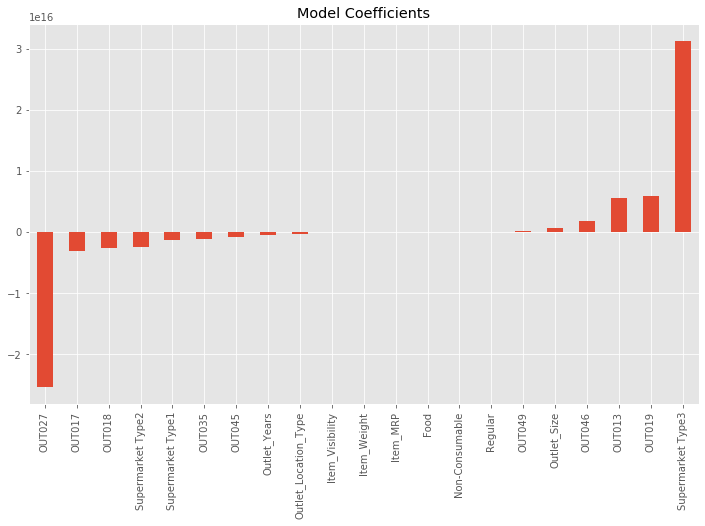

In [32]:
#Fit Linear Regression Model with Training Set
lr.fit(X_train, y_train)

labels = X_train.columns

#Plot Graph to see Coefficient
coef1 = pd.Series(lr.coef_, labels).sort_values()
plt.figure(figsize=(12,7))
coef1.plot(kind='bar', title='Model Coefficients')

# Feature Selection with Backward Elimination

In [33]:
# Import statsmodels
import statsmodels.api as sm

#Adding constant for OLS model
X_1 = sm.add_constant(X_train)

#Fitting sm.OLS model to training set
model = sm.OLS(y_train, X_1).fit()

#P-value
model.pvalues

D:\Python\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                    1.015320e-57
Item_Weight              5.886665e-01
Item_Visibility          1.381488e-01
Item_MRP                 0.000000e+00
Outlet_Size              1.057739e-07
Outlet_Location_Type     9.597953e-69
Outlet_Years             2.952730e-05
Supermarket Type1       2.615222e-235
Supermarket Type2        5.353853e-83
Supermarket Type3        0.000000e+00
Regular                  1.603921e-02
Food                     6.888610e-01
Non-Consumable           4.545091e-01
OUT013                   1.591074e-62
OUT017                   1.403144e-08
OUT018                   5.353853e-83
OUT019                   3.105050e-95
OUT027                   0.000000e+00
OUT035                   6.629191e-31
OUT045                   2.933532e-03
OUT046                   6.160141e-04
OUT049                   3.515349e-04
dtype: float64

In [34]:
#Backward Elimination
cols = list(X_train.columns)
pmax = 1

while (len(cols)>0):
    
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if (pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break

In [35]:
selected_features_BE = cols
print(selected_features_BE)

['Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Years', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Regular', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049']


In [36]:
#Backward Elimination Data
X_train_BE = X_train[selected_features_BE]

#Cross Validate for Linear Regression Model after Backward Elimination
lrBE_score = -cross_val_score(lr, X_train_BE, y_train, scoring = 'neg_mean_squared_error', cv=10)

#Average RMSE
RMSE_BE = np.sqrt(np.mean(lrBE_score))

print('RMSE of Linear Regression:{:.2f}'.format(RMSE_BE))

RMSE of Linear Regression:1142.94


# Feature Selection with Embedded Method

In [37]:
#Using Lasso Regression for Embedded Method
from sklearn.linear_model import LassoCV, Lasso

#Instantiate LassoCV by using 10 fold
lasso_cv = LassoCV(cv=10, random_state=42, normalize=True)

#Fit cross validate to training set
lasso_cv.fit(X_train, y_train)

#Find Best Alpha and Best Score
print('Best Alpha using built-in LassoCV: %f' %lasso_cv.alpha_)
print('Best Score using built-in LassoCV: %f' %lasso_cv.score(X_train, y_train))

Best Alpha using built-in LassoCV: 0.054601
Best Score using built-in LassoCV: 0.559977


In [38]:
coef = pd.Series(lasso_cv.coef_, index = X_train.columns)
print('Lasso picked ' + str(sum(coef !=0))+ ' variables and eliminated the other '+str(sum(coef==0))+' variables')

Lasso picked 16 variables and eliminated the other 5 variables


Text(0.5, 1.0, 'Feature Importance Using Lasso Model')

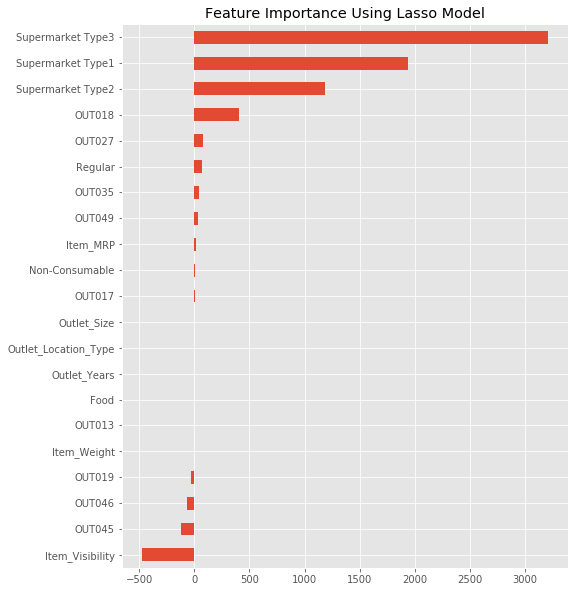

In [39]:
#Plot Coef Graph
imp_coef = coef.sort_values()
plt.figure(figsize = (8, 10))
imp_coef.plot(kind='barh')
plt.title('Feature Importance Using Lasso Model')

In [40]:
cols_lasso = coef[coef!=0].index

#Embedded Method with LassoCV data set
X_train_lasso = X_train[cols_lasso]

#Cross Validate for Linear Regression Model after Lasso Selection
lrEM_score = -cross_val_score(lr, X_train_lasso, y_train, scoring = 'neg_mean_squared_error', cv=10)

#Average RMSE
RMSE_EM = np.sqrt(np.mean(lrEM_score))

print('RMSE of Linear Regression:{:.2f}'.format(RMSE_EM))

RMSE of Linear Regression:1143.26


# Recursive Feature Elimination

In [41]:
#Import Recursive Feature Selection
from sklearn.feature_selection import RFE

#No of Features
nof_list = np.arange(1,21)
high_score = 0

#Variable to store the optimum features
nof = 0
score_list = []
for n in range(len(nof_list)):
    model = LinearRegression(normalize=True)
    rfe = RFE(model, nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe, y_train)
    score = model.score(X_test_rfe, y_test)
    score_list.append(score)
    if (score > high_score):
        high_score = score
        nof = nof_list[n]

print('Optimum number of features: %d' %nof)
print('Score with %d features: %f' %(nof, high_score))

Optimum number of features: 19
Score with 19 features: 0.569696


In [42]:
#Feature Given by RFE
cols_rfe = list(X_train.columns)
model = LinearRegression(normalize=True)

#Instantiate RFE Model
rfe = RFE(model, 19)

#Transforming Data using RFE
X_train_rfe = rfe.fit_transform(X_train, y_train)

#Fitting data to the model
model.fit(X_train_rfe, y_train)

#Feature Selection
temp = pd.Series(rfe.support_, index = cols_rfe)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3',
       'Regular', 'Food', 'Non-Consumable', 'OUT013', 'OUT017', 'OUT018',
       'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049'],
      dtype='object')


In [43]:
#Embedded Method with LassoCV data set
X_train_RFE = X_train[selected_features_rfe]

#Cross Validate for Linear Regression Model after Lasso Selection
lrRFE_score = -cross_val_score(lr, X_train_RFE, y_train, scoring = 'neg_mean_squared_error', cv=10)

#Average RMSE
RMSE_RFE = np.sqrt(np.mean(lrRFE_score))

print('RMSE of Linear Regression:{:.2f}'.format(RMSE_RFE))

RMSE of Linear Regression:1143.63
